In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr, spearmanr
from scipy import stats

import wrangle as w
import explore as e
import model as m

# Project Description
We will be analyzing, factors that affect wine quality. Our objective is to build a predictive model that can estimate the quality of a given wine. The focus here is to gain insights and understanding about the factors influencing wine quality rather than generating practical predictions.

# Project Goal

* We will be analyzing, exploring the different attributes affecting red and white wine quality. 
* We will be creating a model based on to predict the quality of the wine.
* This data would not be used on future properties or for real life prediction.

# Initial Thoughts

The initial hypothesis for this project is that certain factors such as 'alcohol','residual_sugar','total_sulfur_dioxide','chlorides','volatile_acidity', 'ph' may be significant drivers of wine quality.

# Acquire
* Aquire dataset from [Data.World: Wine Quality](https://data.world/food/wine-quality)
* It contains two datasets: winequality-red.csv (1599 rows × 12 columns) & winequality-white.csv (4898 rows × 12 columns) 
* Each row represents a unique wine
* Each column represents a feature of those wines.

# Prepare
- Prepare Actions:
    * Fixed columns names to promote readability
    * Removed unecessary columns
    * Checked for nulls in the data. No nulls were found.
    * Checked that column data types were appropriate
    * Added wine_type column, which identifies if the wine is red or white
    * Added quality_type column, which identifies if the wine is low <= 5 quality or high > 5 quality
    * Encoded categorical variables
    * Split data into train, validate and test (approx. 60/20/20)
    * 578 outliers have been removed for the iteration of the project, based on if they fell outside the 4 standard deviation

# Acquire, Prepare, and Clean Data

In [2]:
train, validate, test = w.clean_wine()

# DataFrame Summary

In [3]:
train.head()

,volatile_acidity,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,ph,alcohol,quality,red_wine,wine_type,quality_type
1961,0.21,1.3,0.039,21.0,123.0,2.90,9.5,5,0,white,low
3624,0.36,6.1,0.029,12.0,93.0,3.19,12.8,7,0,white,high
216,0.27,7.0,0.036,45.0,164.0,3.03,11.0,5,0,white,low
657,0.34,3.2,0.050,14.0,136.0,3.25,10.2,5,0,white,low
1571,0.30,8.2,0.055,49.0,188.0,3.52,9.7,6,0,white,high


# Explore

## Does Low Quality Wine Contain More Alcohol? 
$H_o$: The average alcohol amount for high quality wine is less than or equal to the average alcohol amount for low quality wines
    
$H_a$: The average alcohol amount for high quality wine is greater than or equal to the average alcohol amount for low quality wines

**I will use an Independent T-Test (1-tailed), to investigate whether high quality wines have more or less alcohol**

* I will use a confidence interval of 95%
* The alpha is .05

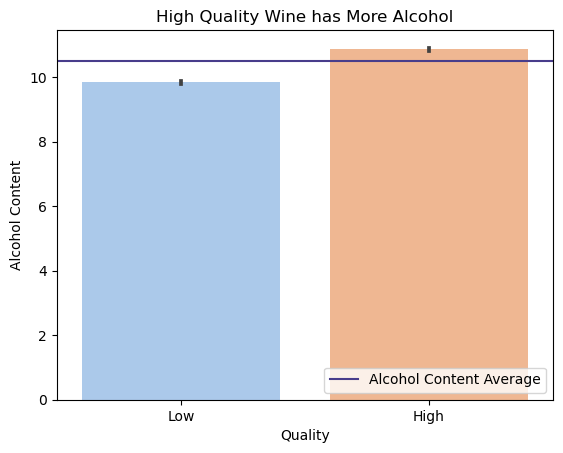

In [4]:
e.alcohol_barplot(train)

Observations: 
* The higher quality wine has more alcohol than low quality wine.

In [5]:
# create samples
low_quality_alcohol = train[train.quality_type == 'low'].alcohol
high_quality_alcohol = train[train.quality_type == 'high'].alcohol
# check variances -- equal
stats.levene(low_quality_alcohol, high_quality_alcohol)
# run T-Test
e.ind_var_test(high_quality_alcohol, low_quality_alcohol)

Reject the null hypothesis: Sufficient
 p-value: 2.18355881069506e-145 , t: 26.91755322776039


**We reject the null hypothesis, therfore, we have evidence to support that the average amount of alcohol in high quality wine is more than the average amount of alcohol in low quality wine. Based on this, I believe that using the 'alcohol' feature in modeling will have a small positive impact on the model's accuracy.**

## Does Residual Sugar Affect Wine Quality?
$H_o$: The average residual sugar for low quality wine is less than or equal to the average residual sugar for high quality wines

$H_a$: The average residual sugar for low quality wine is greater than the average residual sugar for high quality wines

**I will use an Independent T-Test (1-tailed), to investigate whether low quality wines have more or less residual suger**

* I will use a confidence interval of 95%
* The alpha is .05

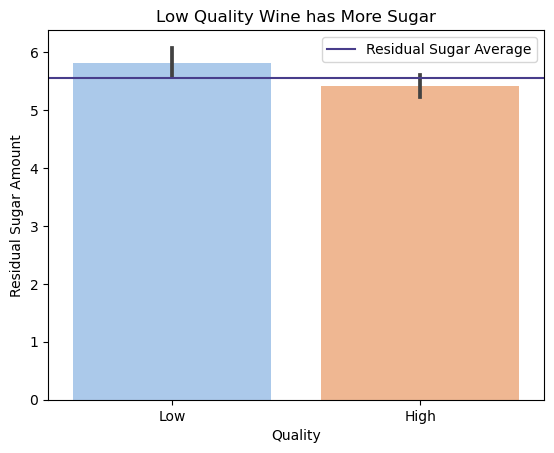

In [6]:
e.sugar_barplot(train)

Observations: 
* The lower quality wine has more sugar then the high quality wine

In [7]:
# create samples
low_quality_sugar = train[train.quality_type == 'low'].residual_sugar 
high_quality_sugar = train[train.quality_type == 'high'].residual_sugar
# check variances -- equal
stats.levene(low_quality_sugar,high_quality_sugar)
# run T-Test
e.ind_var_test(low_quality_sugar,high_quality_sugar)

Reject the null hypothesis: Sufficient
 p-value: 0.012954002416366427 , t: 2.4862880181249474


**We rejected the null hypothesis, therfore, we have evidence to support that the average amount of residual sugar in low quality wine is greater than the average amount of residual sugar in high quality wine. Based on this, I believe that using the 'residual_sugar' feature in modeling will have a small positive impact on the model's accuracy.**

## Does Chlorides Affect Wine Quality?
$H_o$: The average chlorides for low quality wine is less than or equal to the average chorides for high quality wines

$H_a$: The average chlorides for low quality wine is greater than the average chlorides for high quality wines

**I will use an Independent T-Test (1-tailed), to investigate whether low quality wines have more or less chlorides**

* I will use a confidence interval of 95%
* The alpha is .05

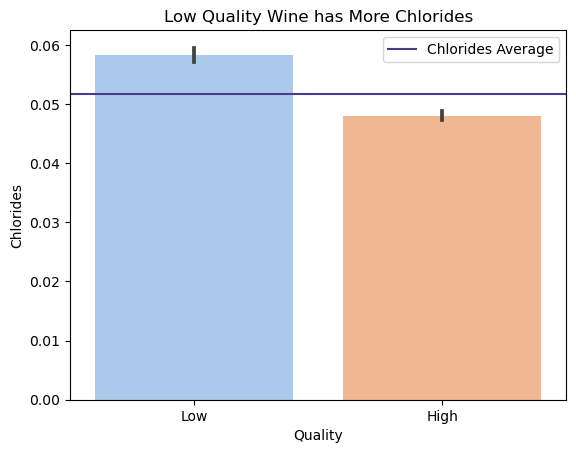

In [8]:
e.chlorides_barplot(train)

Observations: 
* The low quality wines have more chlorides when visually compared to the high quality wines with less chlorides.

In [9]:
# create samples
low_quality_chlorides = train[train.quality_type == 'low'].chlorides 
high_quality_chlorides= train[train.quality_type == 'high'].chlorides
# check variances -- equal
stats.levene(low_quality_chlorides,high_quality_chlorides)
# run T-Test
e.ind_var_test(low_quality_chlorides,high_quality_chlorides)

Reject the null hypothesis: Sufficient
 p-value: 1.0880925145274611e-46 , t: 14.560216648188234


**We rejected the null hypothesis, therfore, we have evidence to support that the average amount of chlorides in low quality wine is greater than the average amount of chlorides in high quality wine. Based on this, I believe that using the 'chlorides' feature in modeling will have a small positive impact on the model's accuracy.**

## Does Total Sulfur Dioxide Affect Wine Quality?

$H_o$: The average total sulfur dioxide for low quality wine is less than or equal to the average total sulfur dioxide for high quality wines

$H_a$: The average total sulfur dioxide for low quality wine is greater than the average total sulfur dioxide for high quality wines

**I will use an Independent T-Test (1-tailed), to investigate whether low quality wines have more or less total sulfur dioxide**

* I will use a confidence interval of 95%
* The alpha is .05

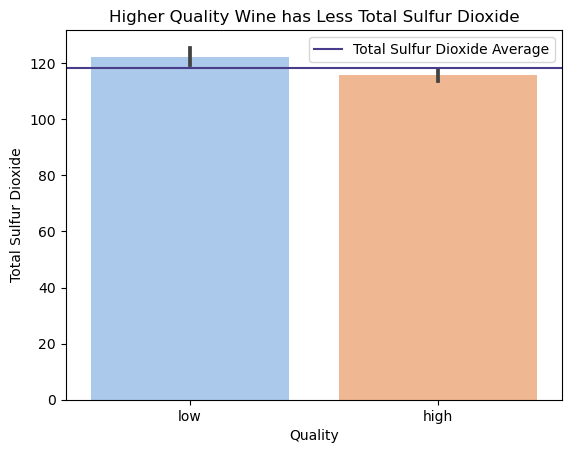

In [10]:
e.tsd_barplot(train)

In [11]:
# create samples
low_quality_tsd = train[train.quality_type == 'low'].total_sulfur_dioxide 
high_quality_tsd = train[train.quality_type == 'high'].total_sulfur_dioxide
# check variances -- equal
stats.levene(low_quality_tsd,high_quality_tsd)
# run T-Test
e.ind_var_test(low_quality_tsd,high_quality_tsd)

Reject the null hypothesis: Sufficient
 p-value: 0.000961107346877886 , t: 3.304441008706457


**We rejected the null hypothesis, therfore, we have evidence to support that the average amount of total sulfur dioxide in low quality wine is greater than the average amount of total sulfur dioxide in high quality wine. Based on this, I believe that using the 'total_sulfur_dioxide' feature in modeling will have a small positive impact on the model's accuracy.**

# Does Volatile Acidity Affect Wine Quality?

$H_o$: The average volatile acidity for low quality wine is less than or equal to the average volatile acidity for high quality wines

$H_a$: The average volatile acidity for low quality wine is greater than the average volatile acidity for volatile acidity wines

**I will use an Independent T-Test (1-tailed), to investigate whether low quality wines have more or less volatile acidity**

* I will use a confidence interval of 95%
* The alpha is .05

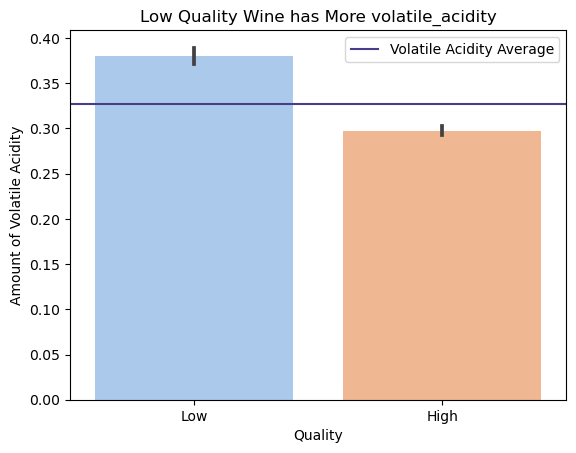

In [12]:
e.volatile_barplot(train)

Observation:

    * high quality wine has less volatile acidity    

In [13]:
# create samples
volatile_low_quality = train[train.quality_type == 'low'].volatile_acidity
volatile_high_quality = train[train.quality_type == 'high'].volatile_acidity
# check variances -- equal
stats.levene(volatile_low_quality, volatile_high_quality)
# run T-Test
e.ind_var_test(volatile_low_quality, volatile_high_quality)

Reject the null hypothesis: Sufficient
 p-value: 8.172040139271046e-61 , t: 16.77148917796174


**We rejected the null hypothesis, therfore, we have evidence to support that the average amount of volatile acidity in low quality wine is greater than the average amount of volatile acidity in high quality wine. Based on this, I believe that using the 'volatile_acidity' feature in modeling will have a small positive impact on the model's accuracy.**

# Does pH Affect Wine Quality?

$H_o$: The average ph for low quality wine is less than or equal to the average ph for high quality wines

$H_a$: The average ph for low quality wine is greater than the average ph for high quality wines

**I will use an Independent T-Test (1-tailed), to investigate whether low quality wines have more or less ph**

* I will use a confidence interval of 95%
* The alpha is .05

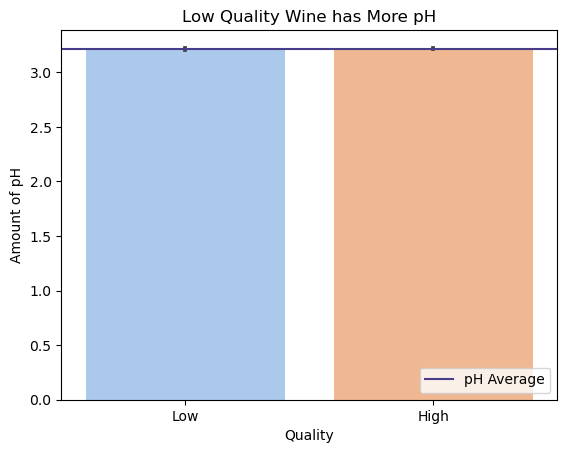

In [14]:
e.ph_barplot(train)

Observation:

    * The pH does not appear to affect the quality of wine.

In [15]:
# create samples
ph_low_quality = train[train.quality_type == 'low'].ph
ph_high_quality = train[train.quality_type == 'high'].ph
# check variances -- equal
stats.levene(ph_low_quality, ph_high_quality)
# run T-Test
e.ind_var_test(ph_low_quality, ph_high_quality)

 Fail to reject the null: Insufficient evidence
 p-value: 0.6816957409422995 , t: -0.41018399347563544


**We failed to reject the null hypothesis, therfore, we do not have evidence to support that the average amount of pH affect the quality of wine. Based on this, I believe that using the 'pH' feature in modeling will not have an impact on the model's accuracy.**

# Clustering
- Data would be scaled using MinMaxScaler and utilize the Kmeans to create the clusters.
- Features that would be used during clustering would be: residual sugar, alcohol, chlorides.

In [33]:
# dropping the target variable columns to create our features variables
target = 'quality'

train, validate, test, x_train, y_train, x_validate, y_validate, x_test, y_test = w.split_data_xy(train, validate, test, target)

train -> (3551, 12)
validate -> (1184, 11)
test -> (1184, 11)


In [34]:
# functions scales the x_train,x_validate,x_test data usinf MinMax Scaler

x_train_scaled,x_validate_scaled,x_test_scaled=w.mm_scale(x_train,x_validate,x_test)

In [35]:
#Choosing the features that would be used for our clustering test
feature_set_1 = ['residual_sugar','alcohol']
train_cluster=x_train_scaled[feature_set_1]
val_cluster=x_validate_scaled[feature_set_1]
test_cluster=x_test_scaled[feature_set_1]

In [38]:
# calculating the KMeans on all  data sets to use for modeling
train_cluster=m.calculate_kmeans(train_cluster,2)
val_cluster=m.calculate_kmeans(val_cluster,2)
test_cluster=m.calculate_kmeans(test_cluster,2)


## Insight:

### During clustering we have confirmed that there is no significant clusters between residual sugar, alcohol and quality of wine.


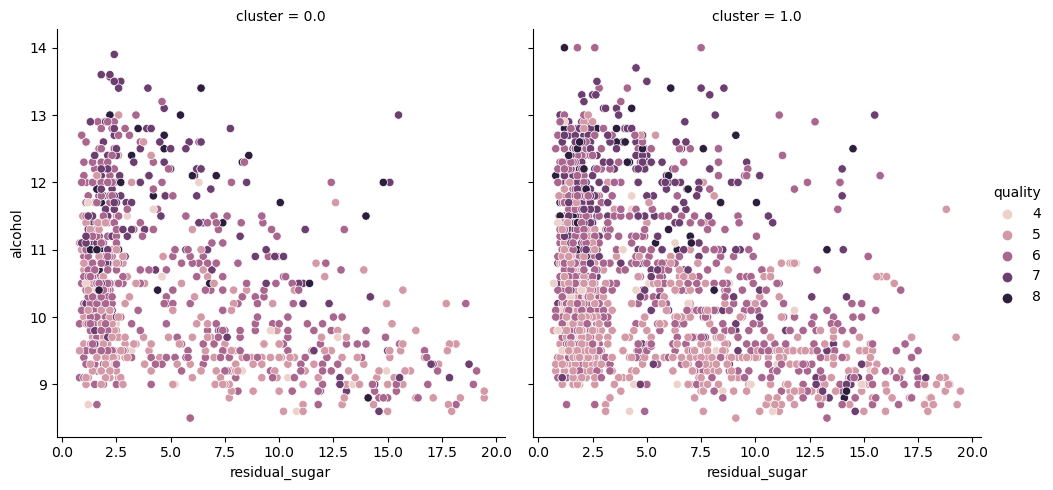

In [39]:
# Adding cluster into our train data for cluster explorarion purposes

train['cluster']=train_cluster['cluster']

# Creating a visualization of our current clusters.
sns.relplot(data=train,
           x='residual_sugar',
           y='alcohol',
           hue='quality',
           col='cluster',
           col_wrap=2)
plt.show()

### Conclusion: We will be using our cluster during the modeling process to see if this would help improve the accuracy of the prediction of wine quality.

# Modeling

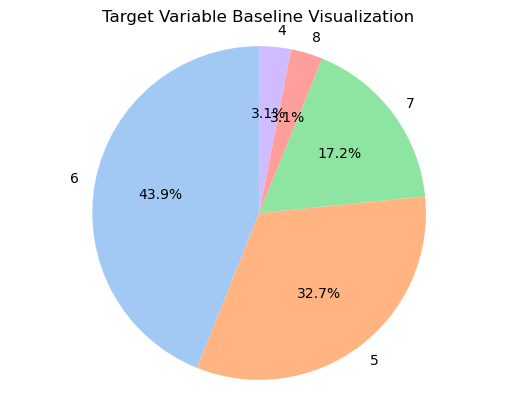

In [23]:
#Baseline visualization:
m.create_pie_chart(train,'quality',"Target Variable Baseline Visualization")

In [40]:
# dropping the target variable columns to create our features variables
target = 'quality'

train, validate, test, x_train, y_train, x_validate, y_validate, x_test, y_test = w.split_data_xy(train, validate, test, target)

train -> (3551, 12)
validate -> (1184, 11)
test -> (1184, 11)


In [41]:
# Adding the cluster column to the dataframe to use for modeling
x_train_cluster = m.add_cluster_col(x_train_scaled, train_cluster)
x_validate_cluster = m.add_cluster_col(x_validate_scaled, val_cluster)
x_test_cluster = m.add_cluster_col(x_test_scaled, test_cluster)


In [42]:
# Selecting the features for modeling purposes
feature_set_2 = ['cluster_1', 'volatile_acidity', 'free_sulfur_dioxide', 'chlorides']
x_train=x_train_cluster[feature_set_2]
x_validate=x_validate_cluster[feature_set_2]
x_test=x_test_cluster[feature_set_2]


In [43]:
m.run_decision_tree(x_train,x_validate,y_train,y_validate,10)

0.4577702702702703

In [44]:
m.run_knn(x_train,x_validate,y_train,y_validate,6)

0.4543918918918919

In [45]:
m.run_knn(x_train,x_validate,y_train,y_validate,7)

0.47719594594594594


# Features continuing to modeling

* Alcohol
* Residual Sugar
* Chlorides
* Total Sulfur Dioxide
* Volatile Acidity

# Features not continuing to modeling

* 'ph' was not found to be a driver of 'Quality' (There is no evidence that 'ph' is a driver of quality)

# Exploration Summary

* 'Alcohol' was found to be a driver of 'Quality', wine with more alcohol was rated higher than wine with less alcohol.
* 'Residual Sugar' was found to be a driver of 'Quality', wine with more residual suger was rated lower than wine with less  residual suger.
* 'Chlorides' was found to be a driver of 'Quality', wine with more chorides was rated lower than wine with less chorides.
* 'Total Sulfur Dioxide' was found to be a driver of 'Quality', wine with more total sulfur dioxide was rated lower than wine with less total sulfur dioxide.
* 'Volatile Acidity' was found to be a driver of 'Quality' for wine, wine with more volatile acidity was rated lower than wine with less voolatile acidity.

## Conclusion
- Utilizing the clusters did increased and in improved our model but only beating baseline for 3%. We would like to explore more without utilizing the cluster festures.

## Modeling without Clusters

In [29]:
#Selecting the features to be used on our new modeling phase.
features = ['alcohol','residual_sugar','total_sulfur_dioxide','chlorides','volatile_acidity']
x_train_feat2=x_train_cluster[features]
x_validate_feat2=x_validate_cluster[features]
x_test_feat2=x_test_cluster[features]


In [30]:
m.fit_DT_random_features(x_train_feat2,y_train,x_validate_feat2,y_validate)

(DecisionTreeClassifier(max_depth=11, random_state=123),
                                                Model  Train Score  \
 0  DecisionTreeClassifier(max_depth=11, random_st...     0.774430   
 1  DecisionTreeClassifier(max_depth=10, random_st...     0.735567   
 2  DecisionTreeClassifier(max_depth=9, random_sta...     0.703182   
 3  DecisionTreeClassifier(max_depth=8, random_sta...     0.665165   
 4  DecisionTreeClassifier(max_depth=7, random_sta...     0.635314   
 
    Validate Score  
 0        0.552365  
 1        0.552365  
 2        0.562500  
 3        0.545608  
 4        0.543919  )

In [31]:
m.fit_KNN_random_features(x_train_feat2,y_train,x_validate_feat2,y_validate)

(KNeighborsClassifier(n_neighbors=2),
                                  Model  Train Score  Validate Score
 0  KNeighborsClassifier(n_neighbors=2)     0.795551        0.528716
 1  KNeighborsClassifier(n_neighbors=3)     0.744861        0.534628
 2  KNeighborsClassifier(n_neighbors=4)     0.709941        0.523649
 3               KNeighborsClassifier()     0.681498        0.544764
 4  KNeighborsClassifier(n_neighbors=6)     0.659533        0.539696,
 [],
 [])

## The model that would be used for our test data set would be: Decision Tree Classifier with a max_depth of 8

In [32]:
# Running model on test data set
m.run_decision_tree(x_train_feat2,x_test_feat2,y_train,y_test,8)

0.5278716216216216

## Conclusion:
- Our model performed ~ 8.6% above baseline of 43.9% on the test data set.

# Summary and Key Findings:

- High quality wine had more alcohol on average than compared to low quality wine.
- There were greater amounts of chlorides, residual sugar, total sulfur dioxide, and volatile acidity in low quality wine.
- pH was not found to affect the quality of wine.

# Recommendations:
- We recommend to use our current model to predict the quality of the wine, and prioritize purchasing wines with more alcohol and less chlorides, residual sugar, total sulfur dioxide, and volatile acidity to reduce the inventory of lower quality wines.

# Takeaways:
- Given more time...
   - We would like to explore other features and incorporate other clusters into our model.
   - Explore other hyperparameters and different models to improve accuracy.
   - Explore binning the target variable differently or use it as a continous variable to look at regression models.
   - Collect more data such as: location of winery, type barrels used, and year of when wine grapes where harvested.